In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', 40)

In [3]:
df = pd.read_csv(r"C:\\Users\\Hassam\\Desktop\\ML papers\\data\\ball_by_ball_it20.csv")

In [4]:
df.head()

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,0,1,0,[],0,NaN,NaN,1,0,259,NaN,119,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,0,1,0,[],0,NaN,NaN,2,0,259,NaN,118,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,0,0,0,[],1,caught,BA King,2,1,259,NaN,117,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,0,0,0,[],0,NaN,NaN,2,1,259,NaN,116,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,NaN,NaN,6,1,259,NaN,115,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [5]:
df = df.loc[:, ['Match ID', 'Date', 'Bat First', 'Bat Second', 'Innings', 'Over', 'Ball', 'Innings Runs', 'Innings Wickets',
      'Target Score', 'Balls Remaining', 'Winner', 'Chased Successfully']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Match ID             425119 non-null  int64 
 1   Date                 425119 non-null  object
 2   Bat First            425119 non-null  object
 3   Bat Second           425119 non-null  object
 4   Innings              425119 non-null  int64 
 5   Over                 425119 non-null  int64 
 6   Ball                 425119 non-null  int64 
 7   Innings Runs         425119 non-null  int64 
 8   Innings Wickets      425119 non-null  int64 
 9   Target Score         425119 non-null  int64 
 10  Balls Remaining      425119 non-null  int64 
 11  Winner               425119 non-null  object
 12  Chased Successfully  425119 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 42.2+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'],format =  '%Y-%m-%d')

In [8]:
# Let's check no of matches played. Let's drop the duplicates to check that.

In [9]:
total_no_of_matches = df.drop_duplicates(subset = ['Match ID'])
print(total_no_of_matches['Match ID'].count())

1842


In [10]:
matches_per_year = total_no_of_matches.groupby([total_no_of_matches.Date.dt.year, 'Chased Successfully'])\
['Match ID'].count().reset_index()

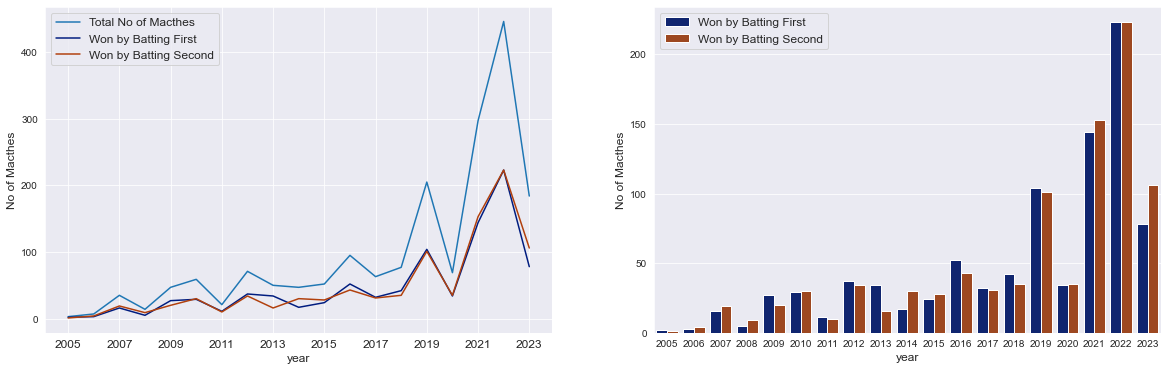

In [11]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.lineplot(data =matches_per_year, x= 'Date', y= 'Match ID', estimator= sum, ci = None, palette = 'deep', 
             label = 'Total No of Matches', ax = ax[0])
sns.lineplot(data =matches_per_year, x= 'Date', y= 'Match ID', estimator= sum, ci = None, hue = 'Chased Successfully',
             palette = 'dark', ax = ax[0])
ticks = list(range(2005, 2024, 2))
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(ticks, fontsize = 12)
ax[0].set_xlabel('year', fontsize = 12)
ax[0].set_ylabel('No of Macthes', fontsize = 12)

ax[0].legend(labels = ['Total No of Macthes', 'Won by Batting First', 'Won by Batting Second'], 
                   loc = 'upper left', fontsize = 12)

sns.barplot(data =matches_per_year, x= 'Date', y= 'Match ID', estimator= sum, ci = None, hue = 'Chased Successfully',
             palette = 'dark', ax = ax[1])

ax[1].set_xlabel('year', fontsize = 12)
ax[1].set_ylabel('No of Macthes', fontsize = 12)
ax[1].legend(labels = ['Won by Batting First', 'Won by Batting Second'], 
                   loc = 'upper left', fontsize = 12);


In [12]:
# Missing values

In [13]:
df.isna().sum()

Match ID               0
Date                   0
Bat First              0
Bat Second             0
Innings                0
Over                   0
Ball                   0
Innings Runs           0
Innings Wickets        0
Target Score           0
Balls Remaining        0
Winner                 0
Chased Successfully    0
dtype: int64

In [14]:
# Checking Distrubition of Total Score

# PART-02 MACHINE LEARNING

In [15]:
model_df = df.iloc[:, 2:-2]

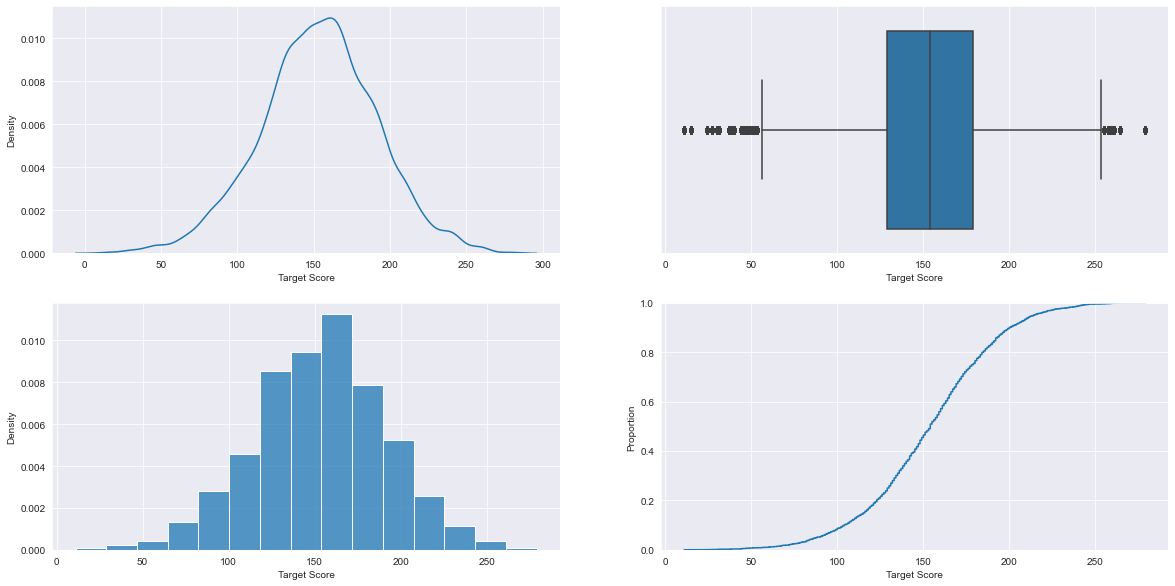

In [16]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
sns.kdeplot(data = model_df, x= 'Target Score', bw_adjust= 2, ax = ax[0][0])
sns.boxplot(data = model_df, x= 'Target Score', ax = ax[0][1])
sns.histplot(data = model_df, x= 'Target Score', bins= 15,stat = 'density', ax= ax[1][0])
sns.ecdfplot(data=model_df, x='Target Score');

In [17]:
# Graph suggests we have gaussian distribution for Target Score.

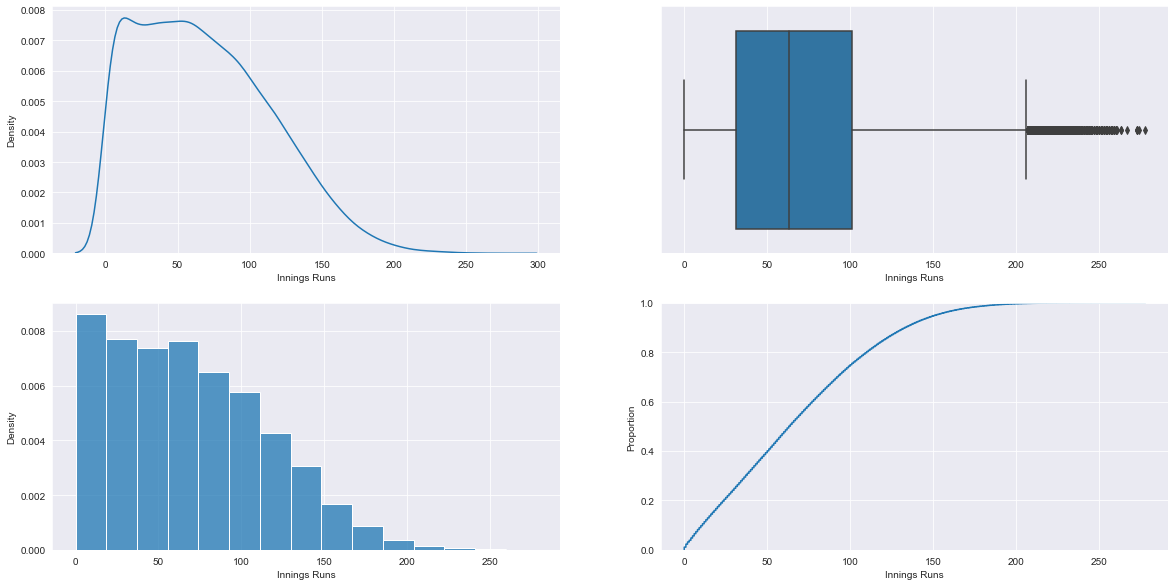

In [18]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
sns.kdeplot(data = model_df, x= 'Innings Runs', bw_adjust= 2, ax = ax[0][0])
sns.boxplot(data = model_df, x= 'Innings Runs', ax = ax[0][1])
sns.histplot(data = model_df, x= 'Innings Runs', bins= 15,stat = 'density', ax= ax[1][0])
sns.ecdfplot(data=model_df, x='Innings Runs');

In [19]:
# Innigs does not follow Gaussian dsirubution. 

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score

In [21]:
model_df

,Bat First,Bat Second,Innings,Over,Ball,Innings Runs,Innings Wickets,Target Score,Balls Remaining
0,West Indies,South Africa,1,1,1,1,0,259,119
1,West Indies,South Africa,1,1,2,2,0,259,118
2,West Indies,South Africa,1,1,3,2,1,259,117
3,West Indies,South Africa,1,1,4,2,1,259,116
4,West Indies,South Africa,1,1,5,6,1,259,115
...,...,...,...,...,...,...,...,...,...
425114,New Zealand,England,2,20,2,162,7,181,4
425115,New Zealand,England,2,20,3,163,7,181,3
425116,New Zealand,England,2,20,4,163,7,181,2
425117,New Zealand,England,2,20,5,164,7,181,1


In [22]:
X_train,X_test,y_train,y_test = train_test_split(model_df.drop(columns=['Target Score']),
                                                 model_df['Target Score'],
                                                 test_size=0.2,
                                                random_state=42)

In [23]:
# We will use MinMAx scaler for Over and Ball and Innings Runs.

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [25]:
X_train

,Bat First,Bat Second,Innings,Over,Ball,Innings Runs,Innings Wickets,Balls Remaining
189275,Pakistan,England,2,9,5,109,4,67
130574,Netherlands,Scotland,2,18,6,144,7,12
105807,Australia,Pakistan,1,13,2,114,2,46
323399,Pakistan,England,2,1,5,3,1,115
78973,Pakistan,Sri Lanka,1,15,1,104,2,35
...,...,...,...,...,...,...,...,...
259178,Croatia,Turkey,1,7,3,45,4,81
365838,Australia,New Zealand,2,13,3,107,2,45
131932,Papua New Guinea,Ireland,2,16,4,83,8,26
146867,Estonia,Isle of Man,1,9,3,34,4,69


In [26]:
trf1 = ColumnTransformer(transformers = [('scale',MinMaxScaler(), [2,3,4,5,6,7]),
                                        ('ohe', OneHotEncoder(sparse=False), [0,1])], remainder='passthrough')

In [27]:
trf2 =  XGBRegressor()

In [28]:
from sklearn import set_config
set_config(display='diagram')

In [29]:
pipe_line = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)])

In [30]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [2, 3, 4, 5, 6, 7]),
                                                 ('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1])])),
                ('trf2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categori...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [31]:
y_predict = pipe_line.predict(X_test)

In [32]:
r2_score(y_test, y_predict).round(2)

0.66

In [33]:
# test from unseen data

In [88]:
data1 = pd.DataFrame({'Bat First': 'India' ,'Bat Second': 'Pakistan', 'Innings' : [1], 
 'Over' : [19], 'Ball' : [0], 'Innings Runs' :[113], 'Innings Wickets' :[9], 'Balls Remaining': [6]})

In [89]:
pipe_line.predict(data1).round(2)

array([124.57], dtype=float32)